In [1]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import numpy as np
import copy
#import torch
#import torch.nn as nn
from sklearn.metrics import auc, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [12]:
dirs = ["512_runs", "2k_runs", "6k_runs", "6k_512_runs", "6k_2k_runs"]   
image_size = ["Standard", "CHIPS-Medium", "CHIPS-Large", "CHIPS-Large -> Standard", "CHIPS-Large -> CHIPS-Medium"]

for i, dir in enumerate(dirs):
    fpr = np.insert(np.load(f"{dir}/overall_macro_fpr.npy"), 0, 0)
    tpr = np.insert(np.load(f"{dir}/overall_macro_tpr.npy"), 0, 0)
    plt.plot(fpr, tpr, label = f"{image_size[i]}", linewidth=2)

plt.legend(loc="lower right", prop={'size': 6})
ax = plt.gca()
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig("pat_auc_macro.pdf", format="pdf", bbox_inches="tight")
plt.clf()

for i, dir in enumerate(dirs):
    fpr = np.insert(np.load(f"{dir}/overall_micro_fpr.npy"), 0, 0)
    tpr = np.insert(np.load(f"{dir}/overall_micro_tpr.npy"), 0, 0)
    plt.plot(fpr, tpr, label = f"{image_size[i]}", linewidth=2)

plt.legend(loc="lower right", prop={'size': 6})
ax = plt.gca()
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig("pat_auc_micro.pdf", format="pdf", bbox_inches="tight")
plt.clf()

<Figure size 432x288 with 0 Axes>

Debugging

[0.         0.         0.05263158 0.09090909 0.10526316 0.13043478
 0.13636364 0.17391304 0.18181818 0.21052632 0.26086957 0.40909091
 0.42105263 0.56521739 0.57894737 0.63157895 0.65217391 0.68181818
 0.86956522 0.94736842 1.        ]
[0.         0.22905983 0.30598291 0.33931624 0.39059829 0.42763533
 0.56096866 0.5980057  0.63133903 0.65698006 0.69401709 0.72735043
 0.77863248 0.81566952 0.84131054 0.86695157 0.9039886  0.93732194
 0.97435897 1.         1.        ]


[0.         0.         0.04545455 0.05263158 0.09090909 0.15789474
 0.17391304 0.21052632 0.39130435 0.42105263 0.43478261 0.60869565
 0.63636364 0.65217391 0.81818182 0.86363636 1.        ]
[0.         0.2034188  0.37008547 0.47264957 0.50598291 0.53162393
 0.56866097 0.61994302 0.69401709 0.69401709 0.73409457 0.80964382
 0.84910409 0.88964224 0.95973723 0.96980292 1.        ]


[0.         0.         0.04545455 0.05263158 0.08695652 0.10526316
 0.13636364 0.18181818 0.31578947 0.34782609 0.36363636 0.77272727
 0.78260

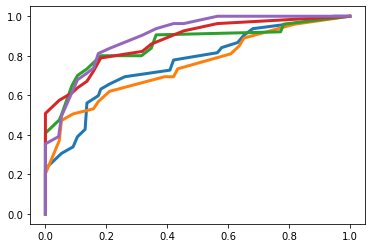

In [7]:
for i, dir in enumerate(dirs):
    fpr = np.insert(np.load(f"{dir}/overall_macro_fpr.npy"), 0, 0)
    tpr = np.insert(np.load(f"{dir}/overall_macro_tpr.npy"), 0, 0)
    print(fpr)
    print(tpr)
    print()
    print()
    plt.plot(fpr, tpr, label = f"{image_size[i]}", linewidth=3)

[0.       0.       0.       0.046875 0.046875 0.0625   0.0625   0.09375
 0.09375  0.203125 0.203125 0.234375 0.234375 0.3125   0.3125   0.359375
 0.359375 0.390625 0.390625 0.40625  0.40625  0.421875 0.421875 0.453125
 0.453125 0.46875  0.46875  0.484375 0.484375 0.5      0.5      0.546875
 0.546875 0.609375 0.609375 0.671875 0.671875 0.765625 0.765625 0.8125
 0.8125   0.96875  0.96875  1.      ]
[0.      0.03125 0.09375 0.09375 0.125   0.125   0.15625 0.15625 0.1875
 0.1875  0.21875 0.21875 0.25    0.25    0.28125 0.28125 0.375   0.375
 0.40625 0.40625 0.53125 0.53125 0.59375 0.59375 0.65625 0.65625 0.6875
 0.6875  0.71875 0.71875 0.75    0.75    0.78125 0.78125 0.8125  0.8125
 0.875   0.875   0.9375  0.9375  0.96875 0.96875 1.      1.     ]


[0.       0.       0.       0.0625   0.0625   0.140625 0.140625 0.15625
 0.15625  0.21875  0.21875  0.234375 0.234375 0.3125   0.3125   0.328125
 0.328125 0.375    0.375    0.390625 0.390625 0.421875 0.421875 0.53125
 0.53125  0.59375  0.59375  

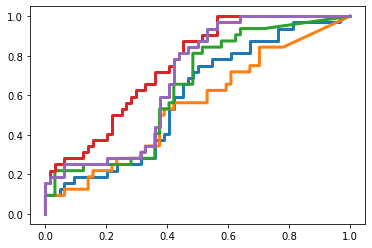

In [6]:
for i, dir in enumerate(dirs):
    fpr = np.load(f"{dir}/overall_micro_fpr.npy")
    tpr = np.load(f"{dir}/overall_micro_tpr.npy")
    print(fpr)
    print(tpr)
    print()
    print()
    plt.plot(fpr, tpr, label = f"{image_size[i]}", linewidth=3)

In [11]:
for i, dir in enumerate(dirs):
    fpr = np.insert(np.load(f"{dir}/overall_macro_fpr.npy"), 0, 0)
    tpr = np.insert(np.load(f"{dir}/overall_macro_tpr.npy"), 0, 0)
    plt.plot(fpr, tpr, label = f"{image_size[i]}", linewidth=3)

plt.legend(loc="lower right", prop={'size': 6})
ax = plt.gca()
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig("pat_auc_macro.pdf", format="pdf", bbox_inches="tight")
plt.clf()

<Figure size 432x288 with 0 Axes>

[0.       0.       0.       0.046875 0.046875 0.0625   0.0625   0.09375
 0.09375  0.203125 0.203125 0.234375 0.234375 0.3125   0.3125   0.359375
 0.359375 0.390625 0.390625 0.40625  0.40625  0.421875 0.421875 0.453125
 0.453125 0.46875  0.46875  0.484375 0.484375 0.5      0.5      0.546875
 0.546875 0.609375 0.609375 0.671875 0.671875 0.765625 0.765625 0.8125
 0.8125   0.96875  0.96875  1.      ]
[0.      0.03125 0.09375 0.09375 0.125   0.125   0.15625 0.15625 0.1875
 0.1875  0.21875 0.21875 0.25    0.25    0.28125 0.28125 0.375   0.375
 0.40625 0.40625 0.53125 0.53125 0.59375 0.59375 0.65625 0.65625 0.6875
 0.6875  0.71875 0.71875 0.75    0.75    0.78125 0.78125 0.8125  0.8125
 0.875   0.875   0.9375  0.9375  0.96875 0.96875 1.      1.     ]


[0.       0.       0.       0.0625   0.0625   0.140625 0.140625 0.15625
 0.15625  0.21875  0.21875  0.234375 0.234375 0.3125   0.3125   0.328125
 0.328125 0.375    0.375    0.390625 0.390625 0.421875 0.421875 0.53125
 0.53125  0.59375  0.59375  

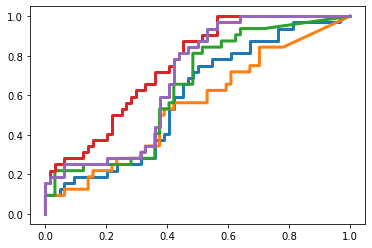

In [24]:
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

ModuleNotFoundError: No module named 'ggplot'

In [21]:
for i, dir in enumerate(dirs):
    fpr = np.load(f"{dir}/overall_micro_fpr.npy")
    tpr = np.load(f"{dir}/overall_micro_tpr.npy")
    print(fpr)
    print(tpr)
    print()
    print()
    plt.plot(fpr, tpr, label = f"{image_size[i]}", linewidth=3)

    plt.legend()
ax = plt.gca()
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig("pat_auc_micro.pdf", format="pdf", bbox_inches="tight")    
plt.clf()

<Figure size 432x288 with 0 Axes>